In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Ngan\Desktop\Wholesale customers data.csv')

In [3]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
df1 = df.drop(['Region','Channel'], axis=1)

In [5]:
df1.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

In [6]:
df1.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [7]:
#take 3 index of the data to track
df1.loc[[100,200,300],:]

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
100  11594   7779    12144    3252              8035        3029
200   3067  13240    23127    3941              9959         731
300  16448   6243     6360     824              2662        2005

In [8]:
df1.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [9]:
fresh_q1 = 3127.75000
df1.loc[df1.Fresh < fresh_q1].head()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
16   1020   8816    12121     134              4508        1080
31   2612   4339     3133    2088               820         985
34   1502   1979     2262     425               483         395
35    688   5491    11091     833              4239         436
43    630  11095    23998     787              9529          72

In [10]:
frozen_q1 = 742.250000
df1.loc[df1.Frozen < frozen_q1].head()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   12669   9656     7561     214              2674        1338
5    9413   8259     5126     666              1795        1451
6   12126   3199     6975     480              3140         545
8    5963   3648     6192     425              1716         750
12  31714  12319    11757     287              3881        2931

In [11]:
frozen_q3 = 3554.250000
df1.loc[df1.Frozen > frozen_q3].head()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
3   13265   1196     4221    6404               507        1788
4   22615   5410     7198    3915              1777        5185
10   3366   5403    12974    4400              5977        1744
22  31276   1917     4469    9408              2381        4334
23  26373  36423    22019    5154              4337       16523

In [12]:
#43: very low Fresh and very high Grocery
#12: very low Frozen and very high Fresh
#39: vvery high Frozen and very low Detergents_Paper

In [13]:
index = [43,12,39]
samples = pd.DataFrame(df1.loc[index],columns = df1.columns).reset_index(drop=True)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_data1 = df1.describe().loc['mean',:]
samples_bar = samples.append(mean_data1)
samples_bar.index = index + ['mean']
samples_bar.plot(kind='bar',figsize=(14,8))

In [15]:
percentiles = df1.rank(pct=True)

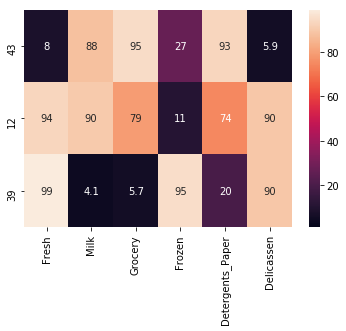

In [16]:
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[index]
sns.heatmap(percentiles,vmin=1, vmax=99, annot=True)

In [17]:
#The type 1: Look index 39: High spending on Fresh, Frozen, Delicassen=>coffee
#The type 2: Look index 12: High spending on Fresh, little spending on Frozen
#The type 3: Low spending on frozen, high spending on Fresh, Milk, Grocery => upscale restaurants

In [18]:
df1.corr()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000

In [19]:
#Detergents_Paper & Grocery is high correlation
#Grocery & Milk is high correlation
#Detegents_Paper & Milk(not too strong)

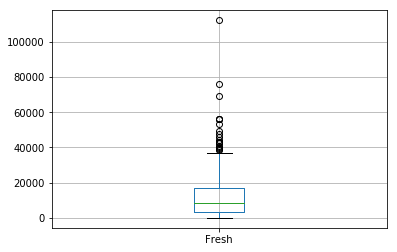

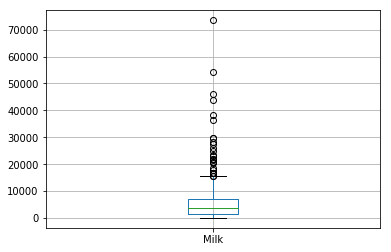

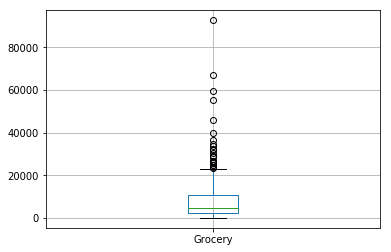

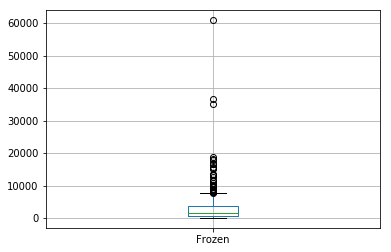

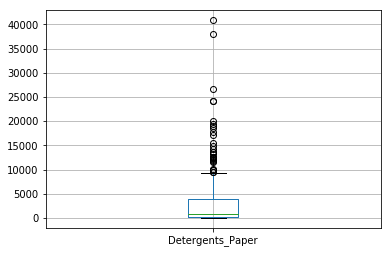

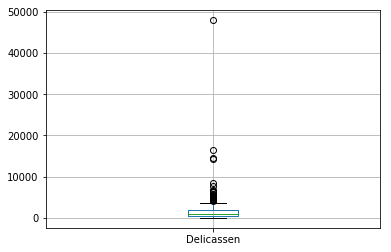

In [20]:
import numpy as np
import matplotlib.pyplot as plt


for column in df1:
    plt.figure()
    df1.boxplot([column])

In [21]:
def fixoutliers(x):
    for j in x.columns:
        try:
            print("colnames ",j)
            xy=x[j]    
            mydata=pd.DataFrame()
        #print(xy)
            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR
            for i in xy:
                if(i>maximum):
                    print("Entering maxim")
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    print("enterinf minimum")
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)
                    x[j]=updated
        except:
                    continue
    return x

In [22]:
fix = fixoutliers(df1)

colnames  Fresh
colnames  Milk
colnames  Grocery
colnames  Frozen
colnames  Detergents_Paper
colnames  Delicassen


In [23]:
fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [24]:
# scaling the data before PCA
from sklearn.preprocessing import scale
data1 = pd.DataFrame(scale(fix), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
data1.head()

C:\Users\Ngan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347

In [25]:
# implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data1)
pca_samples = pca.transform(data1)

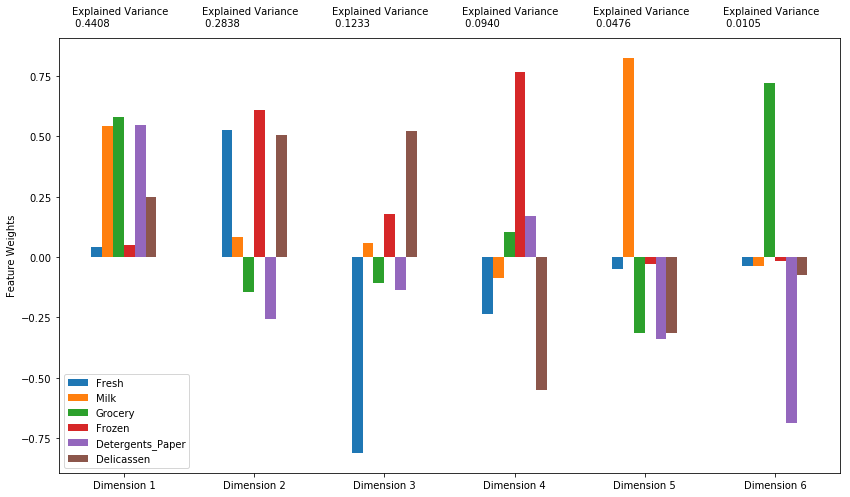

In [26]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data1, pca)

In [27]:
pca_results.cumsum()

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4408  0.0429  0.5451   0.5793  0.0512   
Dimension 2              0.7246  0.5708  0.6283   0.4332  0.6625   
Dimension 3              0.8479 -0.2415  0.6887   0.3248  0.8409   
Dimension 4              0.9419 -0.4782  0.6015   0.4308  1.6096   
Dimension 5              0.9895 -0.5269  1.4281   0.1158  1.5817   
Dimension 6              1.0000 -0.5629  1.3901   0.8375  1.5661   

             Detergents_Paper  Delicassen  
Dimension 1            0.5486      0.2487  
Dimension 2            0.2934      0.7529  
Dimension 3            0.1572      1.2768  
Dimension 4            0.3289      0.7247  
Dimension 5           -0.0107      0.4100  
Dimension 6           -0.6966      0.3349

In [28]:
#72.76% of the variance in the data is explained by the first and second principal components.
#94.19% of the variance in the data is explained by the first four principal components.

In [29]:
#PC1: increase in PC1 is associated with large increases in Milk, Grocery, Detegents_Paper spending
#PC2: increase in Milk, Frozen, Delicatessen spending
#PC3: Associated with a large increases in Delicassen, decrease in Fresh spending
#PC4: Large increase in Frozen and decrease in Delicatessen spending

In [31]:
# implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data1)
pca_samples = pca.transform(data1)

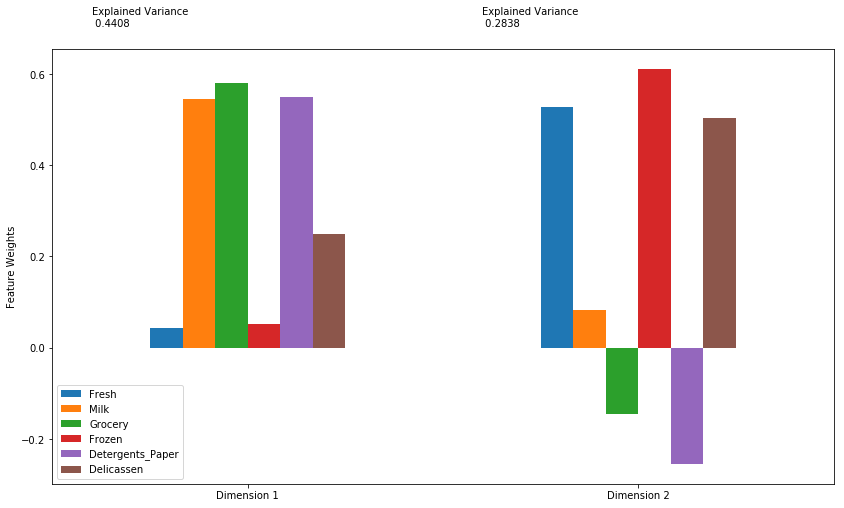

In [33]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data1, pca)

In [34]:
pca_results.cumsum()

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4408  0.0429  0.5451   0.5793  0.0512   
Dimension 2              0.7246  0.5708  0.6283   0.4332  0.6625   

             Detergents_Paper  Delicassen  
Dimension 1            0.5486      0.2487  
Dimension 2            0.2934      0.7529

In [37]:
# Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

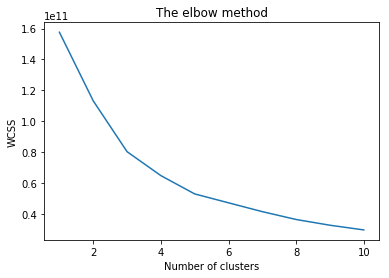

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')